In [1]:
##!pip install openpyxl

#### Q1.Write a code to import  Dataframe in Python

In [2]:
import pandas as pd

# range of rows and columns
start_row = 4   
end_row = 17    
columns = 'B:L' 

# Reading the Excel file with the specified range
xls = pd.read_excel('Test Case.xlsx', engine="openpyxl", sheet_name='Python Test', usecols=columns, skiprows=start_row, nrows=end_row - start_row + 1)


In [3]:
xls.head(7)

,Emp ID,Region,Name,Department,Month,Year,Sales,Discounts,Date,%Sales,% Discount
0,10001,East,"DeRusha, Joe",5255-Data/Connectivity Sales,Jan,FY13,100000,25000,24-01-2023,NaN,NaN
1,10002,East,"De Pasquale, Richard",5256-Sales Mgt & Support,Jan,FY13,150000,30000,2023-01-01 00:00:00,NaN,NaN
2,10003,East,"Dobbert, Susan",5257-Auto Sales,Jan,FY13,200000,35000,2023-01-08 00:00:00,NaN,NaN
3,10001,East,"DeRusha, Joe",5255-Data/Connectivity Sales,Jan,FY13,100000,25000,2023-01-28 00:00:00,NaN,NaN
4,10002,East,"De Pasquale, Richard",5256-Sales Mgt & Support,Jan,FY13,150000,30000,2023-01-21 00:00:00,NaN,NaN
5,10003,East,"Dobbert, Susan",5257-Auto Sales,Jan,FY13,200000,35000,2023-01-23 00:00:00,NaN,NaN
6,10005,West,"Dunton, Donna",5259-Sales Channel,Jan,FY13,300000,45000,2023-01-14 00:00:00,NaN,NaN


#### Q2.Write the code to find unique Name in above table

In [4]:
# Get unique names
unique_names = xls['Name'].unique()

print(unique_names)

['DeRusha, Joe' 'De Pasquale, Richard' 'Dobbert, Susan' 'Dunton, Donna'
 'De Sousa, Kristi' 'Dillard, Susan' 'De Vries, John' 'Defonso, Daniel']


#### Write the code to find top 3 sales with Name and Department?

In [5]:
top3_sales = xls.groupby(['Name','Department'])['Sales'].sum().reset_index().nlargest(3,'Sales')
top3_sales

,Name,Department,Sales
1,"De Sousa, Kristi",5263-Sales Support,800000
7,"Dunton, Donna",5259-Sales Channel,600000
4,"Defonso, Daniel",5264-ARD Sales,450000


####                                                             OR

In [6]:
sort_top3 = xls.sort_values(by='Sales', ascending=False).head(3)[['Name', 'Department', 'Sales']]
sort_top3

,Name,Department,Sales
12,"Defonso, Daniel",5264-ARD Sales,450000
7,"De Sousa, Kristi",5263-Sales Support,400000
11,"De Sousa, Kristi",5263-Sales Support,400000


#### Q4.Replace "DeRusha, Joe" Name with "John" in D Column

In [7]:
xls.loc[xls['Name']=='DeRusha, Joe','Name'] = 'John'

#### Q5.Plot top 5 sales for each Region

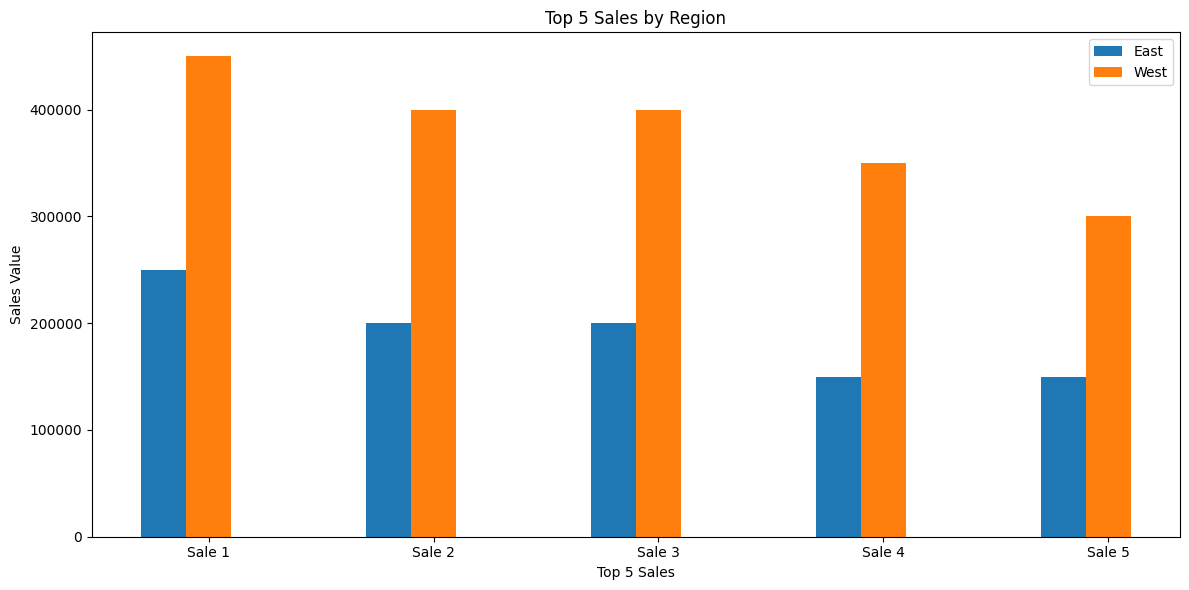

In [24]:
import matplotlib.pyplot as plt
import numpy as np

df1 = xls.groupby('Region')['Sales'].nlargest(5).reset_index()
df_pl = df1[['Region','Sales']]

plt.figure(figsize=(12, 6))


for i, region in enumerate(df_pl['Region'].unique()):
    
    top_sales = df_pl[df_pl['Region'] == region]['Sales']
    
    plt.bar(np.arange(len(top_sales)) + i * 0.2, top_sales, width=0.2, label=region)


plt.xlabel('Top 5 Sales')
plt.ylabel('Sales Value')
plt.title('Top 5 Sales by Region')
plt.xticks(np.arange(5) + 0.2, [f'Sale {i+1}' for i in range(5)])
plt.legend()

plt.tight_layout()
plt.show()


#### Q6.Plot the chart -> percentage contribution of sales for Unique Name

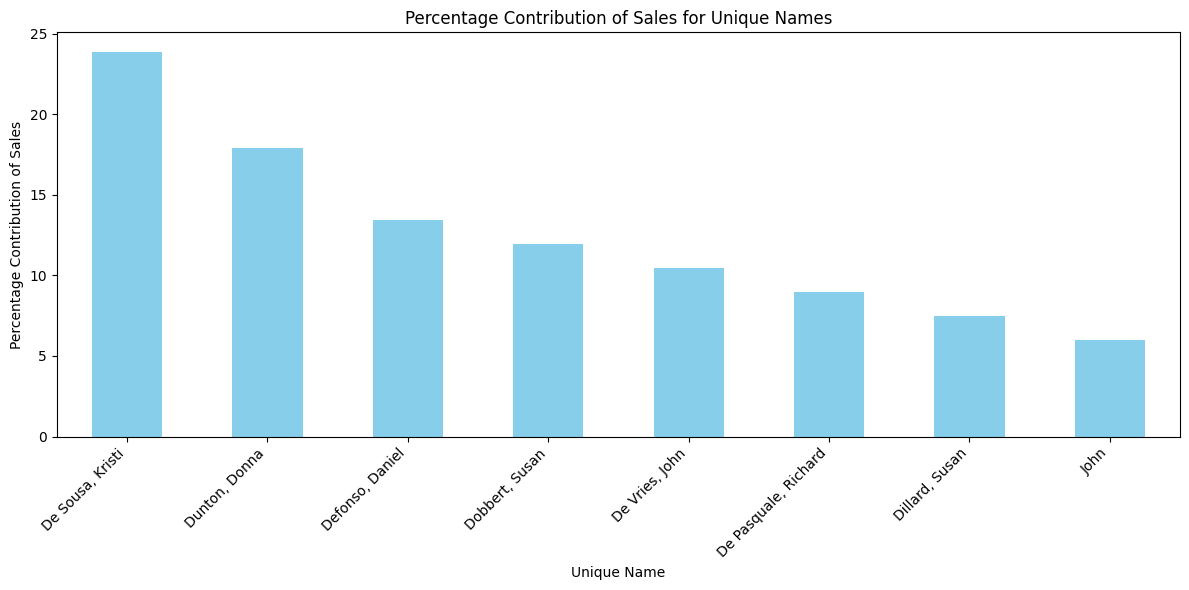

In [25]:
total_sales_per_name = xls.groupby('Name')['Sales'].sum()

# Calculate percentage contribution of sales for each unique name
percentage_contribution = (total_sales_per_name / total_sales_per_name.sum()) * 100

# Sort by percentage contribution
percentage_contribution_sorted = percentage_contribution.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
percentage_contribution_sorted.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Unique Name')
plt.ylabel('Percentage Contribution of Sales')
plt.title('Percentage Contribution of Sales for Unique Names')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
percentage_contribution_sorted

Name
De Sousa, Kristi        23.880597
Dunton, Donna           17.910448
Defonso, Daniel         13.432836
Dobbert, Susan          11.940299
De Vries, John          10.447761
De Pasquale, Richard     8.955224
Dillard, Susan           7.462687
John                     5.970149
Name: Sales, dtype: float64